In [167]:
print('Author: shajidm@student.unimelb.edu.au')
print('StudentId: 977216')
print('Author: Knowledge Technologies Assignment 2')

Author: shajidm@student.unimelb.edu.au
StudentId: 977216
Author: Knowledge Technologies Assignment 2


In [40]:
import pandas as pd
import numpy as np
import os
import matplotlib as plot
import sklearn

In [41]:
df = pd.read_csv('/Users/shajid/Documents/MyWorks/KT/Project2/knowledgetechnologiesproject2/data/raw/train_most100_withheader.csv')

In [42]:
df.head(1)

,id,a,about,after,all,am,amp,an,and,are,...,well,what,when,who,why,will,with,you,your,emoji
0,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Think


In [43]:

df_train_raw = pd.read_csv('/Users/shajid/Documents/MyWorks/KT/Project2/knowledgetechnologiesproject2/data/raw/train_raw.csv',header=None)

In [44]:
df_train_raw.head(2)

,0,1,2
0,11,Think,RT @InbetweenerVids: Is that David Hayes promo...
1,12,Upside,@harmaniac If only I had a relationship to twe...


In [45]:
df_train_raw.count()

0    37143
1    37143
2    37143
dtype: int64

In [46]:
Clapclasses = df_train_raw.loc[(df_train_raw[1]=='Clap'),:]
Cryclasses = df_train_raw.loc[(df_train_raw[1]=='Cry'),:]
Disappointclasses = df_train_raw.loc[(df_train_raw[1]=='Disappoint'),:]
Explodeclasses = df_train_raw.loc[(df_train_raw[1]=='Explode'),:]
FacePalmclasses = df_train_raw.loc[(df_train_raw[1]=='FacePalm'),:]
Handsclasses = df_train_raw.loc[(df_train_raw[1]=='Hands'),:]
Neutralclasses = df_train_raw.loc[(df_train_raw[1]=='Neutral'),:]
Shrugclasses = df_train_raw.loc[(df_train_raw[1]=='Shrug'),:]
Thinkclasses = df_train_raw.loc[(df_train_raw[1]=='Think'),:]
Upsideclasses = df_train_raw.loc[(df_train_raw[1]=='Upside'),:]

In [47]:
Clapclasses[0].count()

3786

In [48]:
Cryclasses[0].count()


4820

In [49]:
Disappointclasses[0].count()


1398

In [50]:
Explodeclasses[0].count()


4118

In [51]:
FacePalmclasses[0].count()


1517

In [52]:
Handsclasses[0].count()


3744

In [53]:
Neutralclasses[0].count()


4580

In [54]:
Shrugclasses[0].count()


3756

In [55]:
Thinkclasses[0].count()

4400

In [56]:
Upsideclasses[0].count()

5024

In [57]:
Upsideclasses.head(5)

,0,1,2
1,12,Upside,@harmaniac If only I had a relationship to twe...
38,139,Upside,RT @LittleMix: When its Monday and time to fac...
53,154,Upside,"RT @rakelxo: where are you finding these guys,..."
56,157,Upside,"I didnt even bother asking them to come, I gav..."
57,158,Upside,RT @stanleygrayy: Youre my happy pill. Thank you


In [58]:
df_train_raw.describe()

,0
count,37143.000000
mean,94099.261934
std,49085.454211
min,11.000000
25%,19286.500000
50%,118572.000000
75%,127857.500000
max,137143.000000


In [59]:
df.emoji.value_counts()

Upside        5024
Cry           4820
Neutral       4580
Think         4400
Explode       4118
Clap          3786
Shrug         3756
Hands         3744
FacePalm      1517
Disappoint    1398
Name: emoji, dtype: int64

In [60]:
df.emoji.value_counts(normalize=True)

Upside        0.135261
Cry           0.129769
Neutral       0.123307
Think         0.118461
Explode       0.110869
Clap          0.101930
Shrug         0.101123
Hands         0.100800
FacePalm      0.040842
Disappoint    0.037638
Name: emoji, dtype: float64

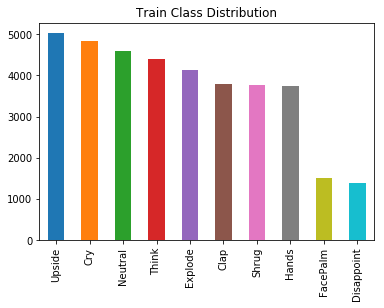

In [61]:
df.emoji.value_counts().plot(kind='bar',title='Train Class Distribution');

In [62]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37143 entries, 0 to 37142
Data columns (total 3 columns):
0    37143 non-null int64
1    37143 non-null object
2    37143 non-null object
dtypes: int64(1), object(2)
memory usage: 870.6+ KB


In [63]:
df_train_most100 = pd.read_csv('/Users/shajid/Documents/MyWorks/KT/Project2/knowledgetechnologiesproject2/data/raw/train_most100.csv',header=None)

In [64]:
df_train_most100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37143 entries, 0 to 37142
Columns: 102 entries, 0 to 101
dtypes: int64(101), object(1)
memory usage: 28.9+ MB


In [65]:
df_train_most100.head(5)

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Think
1,12,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Upside
2,13,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,Explode
3,14,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,Think
4,15,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Shrug


In [66]:
X = df_train_most100.loc[:,1:100].as_matrix().astype('float')
Y = df_train_most100[101].ravel()

In [67]:
print(X.shape)

(37143, 100)


In [68]:
print(Y.shape)

(37143,)


In [69]:
sklearn.__version__

'0.19.1'

In [70]:
df_dev_most100 = pd.read_csv('/Users/shajid/Documents/MyWorks/KT/Project2/knowledgetechnologiesproject2/data/raw/dev_most100.csv',header=None)
X_dev = df_dev_most100.loc[:,1:100].as_matrix().astype('float')
Y_dev = df_dev_most100[101].ravel()

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model_lr_1 = LogisticRegression(random_state=0)

In [73]:
model_lr_1.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
model_lr_1.score(X_dev,Y_dev)

0.36016113120683985

In [75]:
df_test_most100 = pd.read_csv('/Users/shajid/Documents/MyWorks/KT/Project2/knowledgetechnologiesproject2/data/raw/test_most100.csv',header=None)
X_test = df_test_most100.loc[:,1:100].as_matrix().astype('float')

In [76]:
X_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [77]:
predictions = model_lr_1.predict(X_test)

In [78]:
df_submission = pd.DataFrame({'Id':df_test_most100[1],'Survived':predictions})

In [80]:
df_submission.to_csv('/Users/shajid/Documents/MyWorks/KT/Project2/knowledgetechnologiesproject2/data/processed/test_most100.csv',index=False)

In [81]:
model_lr = LogisticRegression(random_state=0)

In [82]:
from sklearn.model_selection import GridSearchCV 

In [83]:
parameters = {'C':[1.0,10.0,50.0,100.0,1000.0],'penalty':['l1','l2']}

In [84]:
clf=GridSearchCV(model_lr,param_grid=parameters,cv=10)

In [85]:
clf.fit(X,Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [86]:
clf.best_params_

{'C': 50.0, 'penalty': 'l1'}

In [87]:
clf.best_score_

0.36119861077457394

In [88]:
clf.score(X_dev,Y_dev)

0.3598322920092075

In [89]:
hello_world_script_file = os.path.join(os.path.pardir,'src')

In [90]:
print(hello_world_script_file)

../src


In [91]:
print(os.path.pardir)

..


In [92]:
df_dev_most100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12164 entries, 0 to 12163
Columns: 102 entries, 0 to 101
dtypes: int64(101), object(1)
memory usage: 9.5+ MB


In [93]:
df_dev_most100[101].value_counts()

Upside        1624
Cry           1587
Neutral       1496
Think         1420
Explode       1334
Hands         1322
Clap          1265
Shrug         1222
Disappoint     461
FacePalm       433
Name: 101, dtype: int64

In [94]:
from sklearn.naive_bayes import MultinomialNB

In [95]:
clfNB = MultinomialNB()

In [96]:
clfNB.fit(X, Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [97]:
clfNB.score(X_dev,Y_dev)

0.3343472541926998

In [98]:
df_train_raw.head(3)

,0,1,2
0,11,Think,RT @InbetweenerVids: Is that David Hayes promo...
1,12,Upside,@harmaniac If only I had a relationship to twe...
2,13,Explode,@shreec Are you a frickin mind reader with thi...


In [99]:
df_train_raw[2][1]

'@harmaniac If only I had a relationship to tweet about. '

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_raw = count_vect.fit_transform(df_train_raw[2])
X_train_raw.shape

(37143, 44262)

In [104]:
print(X_train_raw[1])

  (0, 161)	1
  (0, 39253)	1
  (0, 38469)	1
  (0, 31586)	1
  (0, 14782)	1
  (0, 27663)	1
  (0, 16689)	1
  (0, 15050)	1


In [105]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_raw)
X_train_tfidf.shape

(37143, 44262)

In [106]:
from sklearn.naive_bayes import MultinomialNB
text_clf = MultinomialNB().fit(X_train_tfidf, df_train_raw[1])

In [107]:
df_dev_raw = pd.read_csv('/Users/shajid/Documents/MyWorks/KT/Project2/knowledgetechnologiesproject2/data/raw/dev_raw.csv',header=None,)

In [108]:
df_dev_raw.head(3)

,0,1,2
0,21,Disappoint,RT @slxttybbygirl: Bad girls get soap in the m...
1,22,Upside,RT @Cammmmmm: Everytime all the time https://t...
2,23,Upside,When you staying up for nothing


In [109]:
#X_dev_raw = df_dev_raw.loc[:,2].as_matrix().astype('float')
#Y_dev_raw = df_dev_raw[2].ravel()

In [110]:
>>> from sklearn.pipeline import Pipeline
>>> text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])

In [114]:
#test

In [ ]:
text_clf = text_clf.fit((X_train_tfidf, df_train_raw[1])

In [112]:
predicted = text_clf.predict(df_dev_raw[2])
np.mean(predicted == df_dev_raw[1])

0.5585333771785597

In [119]:
print(X_train_tfidf[0][0]);

  (0, 32577)	0.07551778119017954
  (0, 17071)	0.2687486468591804
  (0, 17557)	0.12903659477287358
  (0, 37526)	0.16201613529331602
  (0, 8488)	0.26551018949876226
  (0, 15173)	0.2685624027379273
  (0, 30031)	0.2687486468591804
  (0, 27832)	0.20661421290229617
  (0, 41845)	0.19744579849604932
  (0, 23779)	0.2687486468591804
  (0, 2313)	0.1686304424189637
  (0, 37564)	0.11135954990553651
  (0, 3501)	0.2687486468591804
  (0, 29812)	0.2649926788934886
  (0, 7234)	0.26764271858376665
  (0, 38486)	0.2084966622966546
  (0, 10467)	0.2687486468591804
  (0, 38604)	0.2687486468591804
  (0, 16121)	0.25997096600353686


In [121]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf_clf = rf.fit(X_train_tfidf, df_train_raw[1])

In [152]:
rf_clf_pipe = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', RandomForestClassifier(n_estimators = 1000, random_state = 0)),])
rf_clf_pipe = rf_clf_pipe.fit(df_train_raw[2], df_train_raw[1])

In [128]:
predicted_rf = rf_clf_pipe.predict(df_dev_raw[2])
np.mean(predicted_rf == df_dev_raw[1])

0.5984873396908912

In [141]:
df_test_raw = pd.read_csv('/Users/shajid/Documents/MyWorks/KT/Project2/COMP90049-2018S1_proj2-data/test_raw.csv',header=None)
#X_test_raw = df_test_raw.loc[:,1:100].as_matrix().astype('float')
predictions_rf_test = rf_clf_pipe.predict(df_test_raw[2])
df_rf_submission = pd.DataFrame({'Id':df_test_most100[0],'Prediction':predictions_rf_test})

In [139]:
df_test_raw.head(1)

,0,1,2
0,31,?,@MichaelProOG @Phillips @DougKyed @nicolecyang...


In [142]:
df_rf_submission.to_csv('/Users/shajid/Documents/MyWorks/KT/Project2/knowledgetechnologiesproject2/data/processed/test_raw_output.csv',index=False)

In [149]:
from sklearn.metrics import classification_report
print(classification_report(df_dev_raw[1], predicted))

             precision    recall  f1-score   support

       Clap       0.85      0.63      0.72      1265
        Cry       0.60      0.65      0.63      1587
 Disappoint       0.95      0.18      0.30       461
    Explode       0.82      0.58      0.68      1334
   FacePalm       0.97      0.25      0.39       433
      Hands       0.87      0.71      0.79      1322
    Neutral       0.48      0.41      0.44      1496
      Shrug       0.73      0.30      0.43      1222
      Think       0.69      0.53      0.60      1420
     Upside       0.30      0.81      0.44      1624

avg / total       0.68      0.56      0.57     12164



In [162]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier()),])

In [154]:
_ = text_clf_svm.fit(df_train_raw[2], df_train_raw[1])
predicted_svm = text_clf_svm.predict(df_dev_raw[2])
np.mean(predicted_svm == df_dev_raw[1])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.5993916474843801

In [155]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf__alpha': (1e-2, 1e-3),}

In [165]:
gs_clf = GridSearchCV(rf_clf_pipe, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(df_train_raw[2], df_train_raw[1])

ValueError: Invalid parameter alpha for estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [157]:
gs_clf.best_score_
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

In [160]:
predicted_gs = gs_clf.predict(df_dev_raw[2])
np.mean(predicted_gs == df_dev_raw[1])

0.618628740545873

In [161]:
predictions_gs_test = gs_clf.predict(df_test_raw[2])
df_rf_submission2 = pd.DataFrame({'Id':df_test_most100[0],'Prediction':predictions_gs_test})
df_rf_submission2.to_csv('/Users/shajid/Documents/MyWorks/KT/Project2/knowledgetechnologiesproject2/data/processed/test_raw_output_gs.csv',index=False)

In [77]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])

In [78]:
text_clf = text_clf.fit(df_train_raw[2], df_train_raw[1])
predicted = text_clf.predict(df_dev_raw[2])
np.mean(predicted == df_dev_raw[1])

0.5674120355146334

In [79]:
text_clf.score(df_dev_raw[2],df_dev_raw[1])

0.5674120355146334

In [80]:
import nltk

In [102]:
from nltk.stem.snowball import SnowballStemmer
# nltk.download()

In [1]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')
text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect),('tfidf', TfidfTransformer()),('mnb', MultinomialNB(fit_prior=False)),])
text_mnb_stemmed = text_mnb_stemmed.fit(df_train_raw[2], df_train_raw[1])
predicted_mnb_stemmed = text_mnb_stemmed.predict(df_dev_raw[2])
np.mean(predicted_mnb_stemmed == df_dev_raw[1])

NameError: name 'SnowballStemmer' is not defined

In [124]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')
text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect),('tfidf', TfidfTransformer()),('mnb', SGDClassifier()),])
text_mnb_stemmed = text_mnb_stemmed.fit(df_train_raw[2], df_train_raw[1])
predicted_mnb_stemmed = text_mnb_stemmed.predict(df_dev_raw[2])
np.mean(predicted_mnb_stemmed == df_dev_raw[1])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.5899375205524499

In [126]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(df_dev_raw[1], predicted_mnb_stemmed, average="macro"))

0.570059879923816


In [136]:
! pip install scikit-plot

    100% |████████████████████████████████| 184kB 3.6MB/s ta 0:00:01


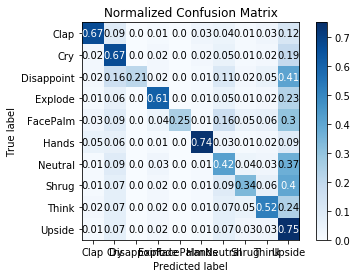

In [137]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(df_dev_raw[1], predicted, normalize=True)

In [139]:
>>> # Import what's needed for the Functions API
>>> import matplotlib.pyplot as plt
>>> import scikitplot as skplt

In [144]:
print(precision_score(df_dev_raw[1], predicted, average=None))

[0.80114177 0.56385798 0.93137255 0.79921645 0.97345133 0.85614035
 0.48473282 0.60888889 0.68181818 0.32162662]
